In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [3]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   6
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 512
other_fuel2                 512
other_fuel3                 512
commissioning_year          220
owner                        17
source                        0
url                           0
geolocation_source            0
wepp_id                     512
year_of_capacity_data         4
generation_gwh_2013         259
generation_gwh_2014         235
generation_gwh_2015         222
generation_gwh_2016         213
generation_gwh_2017         219
generation_gwh_2018         212
generation_gwh_2019         512
generation_data_source      200
estimated_generation_gwh    512
dtype: int64

In [4]:
df1.generation_data_source.value_counts()

Australia Clean Energy Regulator    312
Name: generation_data_source, dtype: int64

In [5]:
df1.year_of_capacity_data.value_counts()

2019.0    508
Name: year_of_capacity_data, dtype: int64

In [6]:
df1.capacity_mw.value_counts()

1.00      18
30.00      9
20.00      8
1.30       7
0.80       7
          ..
228.00     1
0.02       1
34.70      1
260.90     1
10.95      1
Name: capacity_mw, Length: 304, dtype: int64

In [7]:
df1.loc[df1['generation_data_source'].isnull(), 'generation_data_source'] = 'Australia Clear Energy Regulator'
df1.loc[df1['year_of_capacity_data'].isnull(), 'year_of_capacity_data'] = '2019.0'

In [8]:
df1["longitude"] = df1["longitude"].fillna(df1["longitude"].median())
df1["latitude"] = df1["latitude"].fillna(df1["latitude"].median())
df1["capacity_mw"] = df1["capacity_mw"].fillna(df1["capacity_mw"].median())

In [9]:
df1.generation_gwh_2013.value_counts()

1.748889      3
100.758889    3
185.345000    3
47.933889     3
119.899722    3
             ..
150.240556    1
58.819167     1
331.676667    1
256.227500    1
21.947500     1
Name: generation_gwh_2013, Length: 231, dtype: int64

In [10]:
df1["generation_gwh_2013"] = df1["generation_gwh_2013"].fillna(df1["generation_gwh_2013"].mean())
df1["generation_gwh_2014"] = df1["generation_gwh_2014"].fillna(df1["generation_gwh_2014"].mean())
df1["generation_gwh_2015"] = df1["generation_gwh_2015"].fillna(df1["generation_gwh_2015"].mean())
df1["generation_gwh_2016"] = df1["generation_gwh_2016"].fillna(df1["generation_gwh_2016"].mean())
df1["generation_gwh_2017"] = df1["generation_gwh_2017"].fillna(df1["generation_gwh_2017"].mean())
df1["generation_gwh_2018"] = df1["generation_gwh_2018"].fillna(df1["generation_gwh_2018"].mean())
df1["generation_gwh_2019"] = df1["generation_gwh_2019"].fillna(df1["generation_gwh_2019"].mean())

In [11]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 512
other_fuel2                 512
other_fuel3                 512
commissioning_year          220
owner                        17
source                        0
url                           0
geolocation_source            0
wepp_id                     512
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         512
generation_data_source        0
estimated_generation_gwh    512
dtype: int64

In [12]:
df1.commissioning_year.value_counts()

2015.0    19
2012.0    17
2011.0    12
2010.0    11
2013.0    11
          ..
1986.0     1
1955.0     1
1964.0     1
1959.0     1
1990.0     1
Name: commissioning_year, Length: 61, dtype: int64

In [13]:
df1[df1['commissioning_year'].isnull()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
17,AUS,Australia,Bankstown Sports Club,AUS0000399,2.00,-33.9197,151.0332,Oil,NaN,NaN,...,2019.0,778.488685,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Australia Clear Energy Regulator,NaN
19,AUS,Australia,Barcaldine (Len Wishaw),AUS0000008,37.00,-23.5525,145.3142,Gas,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,3.941667,0.844722,NaN,Australia Clean Energy Regulator,NaN
20,AUS,Australia,Barron Gorge,AUS0000151,60.00,-16.8502,145.6465,Hydro,NaN,NaN,...,2019.0,180.463611,202.746111,173.726667,106.883889,127.770278,153.898333,NaN,Australia Clean Energy Regulator,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,AUS,Australia,Yaloak South Wind Farm,AUS0000519,131.00,-37.7281,144.2408,Wind,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,73.959167,NaN,Australia Clean Energy Regulator,NaN
506,AUS,Australia,Yambuk Wind Farm,AUS0000020,30.00,-38.3079,142.0151,Wind,NaN,NaN,...,2019.0,90.292500,93.520833,90.240833,85.811944,86.712500,90.711389,NaN,Australia Clean Energy Regulator,NaN
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN


In [14]:
df2=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [16]:
df2.generation_data_source.value_counts()

Central Electricity Authority    454
Name: generation_data_source, dtype: int64

In [17]:
df2.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [18]:
df2.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [19]:
df2.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [20]:
df2.generation_gwh_2019.value_counts()

Central Electricity Authority    1
Name: generation_gwh_2019, dtype: int64

In [21]:
df2.loc[df2['generation_data_source'].isnull(), 'generation_data_source'] = 'Central Electricity Authority'
df2.loc[df2['other_fuel1'].isnull(), 'other_fuel1'] = 'Oil'
df2.loc[df2['other_fuel2'].isnull(), 'other_fuel2'] = 'Oil'
df2.loc[df2['geolocation_source'].isnull(), 'geolocation_source'] = 'WRI'
df2.loc[df2['generation_gwh_2019'].isnull(), 'generation_gwh_2019'] = 'Central Electricity Authority'

In [23]:
df2["longitude"] = df2["longitude"].fillna(df1["longitude"].median())
df2["latitude"] = df2["latitude"].fillna(df1["latitude"].median())

In [24]:
df2.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [25]:
df2.loc[df2['year_of_capacity_data'].isnull(), 'year_of_capacity_data'] = '2019.0'

In [26]:
df2["generation_gwh_2013"] = df2["generation_gwh_2013"].fillna(df2["generation_gwh_2013"].mean())
df2["generation_gwh_2014"] = df2["generation_gwh_2014"].fillna(df2["generation_gwh_2014"].mean())
df2["generation_gwh_2015"] = df2["generation_gwh_2015"].fillna(df2["generation_gwh_2015"].mean())
df2["generation_gwh_2016"] = df2["generation_gwh_2016"].fillna(df2["generation_gwh_2016"].mean())
df2["generation_gwh_2017"] = df2["generation_gwh_2017"].fillna(df2["generation_gwh_2017"].mean())
df2["generation_gwh_2018"] = df2["generation_gwh_2018"].fillna(df2["generation_gwh_2018"].mean())


In [27]:
df2.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019           0
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [28]:
df3=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')
df3

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [29]:
df3.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                       32
longitude                      32
primary_fuel                 2004
other_fuel1                 10449
other_fuel2                 11610
other_fuel3                 11787
commissioning_year           2050
owner                          13
source                          0
url                             0
geolocation_source              4
wepp_id                     11879
year_of_capacity_data          46
generation_gwh_2013          5408
generation_gwh_2014          5026
generation_gwh_2015          4604
generation_gwh_2016          3917
generation_gwh_2017          3326
generation_gwh_2018          2774
generation_gwh_2019          2102
generation_data_source       1810
estimated_generation_gwh    11879
dtype: int64

In [30]:
df3.generation_data_source.value_counts()

U.S. Energy Information Administration    10069
Name: generation_data_source, dtype: int64

In [31]:
df3.primary_fuel.value_counts()

Solar           3291
Gas             1822
Hydro           1456
Wind            1141
Oil              886
Waste            545
Coal             286
Biomass          155
Storage          104
Geothermal        65
Nuclear           63
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [32]:
df3.commissioning_year.value_counts()

2017.000000    668
2019.000000    598
2018.000000    586
2016.000000    542
2015.000000    419
              ... 
1984.319444      1
2006.435897      1
1974.465556      1
2000.684211      1
2013.775510      1
Name: commissioning_year, Length: 1936, dtype: int64

In [33]:
df3.geolocation_source.value_counts()

U.S. Energy Information Administration    11833
WRI                                          42
Name: geolocation_source, dtype: int64

In [34]:
df3.year_of_capacity_data.value_counts()

2019.0    11833
Name: year_of_capacity_data, dtype: int64

In [35]:
df3.loc[df3['generation_data_source'].isnull(), 'generation_data_source'] = 'U.S. Energy Information Administration'
df3.loc[df3['geolocation_source'].isnull(), 'geolocation_source'] = 'U.S. Energy Information Administration'
df3.loc[df3['year_of_capacity_data'].isnull(), 'year_of_capacity_data'] = '2019.0'
df3.loc[df3['primary_fuel'].isnull(), 'primary_fuel'] = 'Solar'

In [36]:
df3["longitude"] = df3["longitude"].fillna(df3["longitude"].median())
df3["latitude"] = df3["latitude"].fillna(df3["latitude"].median())
df3["commissioning_year"] = df3["commissioning_year"].fillna(df3["commissioning_year"].median())



In [37]:
df3["generation_gwh_2013"] = df3["generation_gwh_2013"].fillna(df3["generation_gwh_2013"].mean())
df3["generation_gwh_2014"] = df3["generation_gwh_2014"].fillna(df3["generation_gwh_2014"].mean())
df3["generation_gwh_2015"] = df3["generation_gwh_2015"].fillna(df3["generation_gwh_2015"].mean())
df3["generation_gwh_2016"] = df3["generation_gwh_2016"].fillna(df3["generation_gwh_2016"].mean())
df3["generation_gwh_2017"] = df3["generation_gwh_2017"].fillna(df3["generation_gwh_2017"].mean())
df3["generation_gwh_2018"] = df3["generation_gwh_2018"].fillna(df3["generation_gwh_2018"].mean())
df3["generation_gwh_2019"] = df3["generation_gwh_2019"].fillna(df3["generation_gwh_2019"].mean())

In [38]:
df3.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 10449
other_fuel2                 11610
other_fuel3                 11787
commissioning_year              0
owner                          13
source                          0
url                             0
geolocation_source              0
wepp_id                     11879
year_of_capacity_data           0
generation_gwh_2013             0
generation_gwh_2014             0
generation_gwh_2015             0
generation_gwh_2016             0
generation_gwh_2017             0
generation_gwh_2018             0
generation_gwh_2019             0
generation_data_source          0
estimated_generation_gwh    11879
dtype: int64

In [39]:
newdf=[df1,df2,df3]

In [40]:
df=pd.concat(newdf)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,563.712786,527.240856,507.402362,452.301744,421.502406,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,Solar,NaN,NaN,...,2019.0,563.712786,527.240856,507.402362,452.301744,421.502406,403.725956,421.938592,U.S. Energy Information Administration,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,Solar,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,452.301744,421.502406,403.725956,421.938592,U.S. Energy Information Administration,NaN


In [41]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN,Australia Clear Energy Regulator,NaN


In [42]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,563.712786,527.240856,507.402362,452.301744,421.502406,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,Solar,NaN,NaN,...,2019.0,563.712786,527.240856,507.402362,452.301744,421.502406,403.725956,421.938592,U.S. Energy Information Administration,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,Solar,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,452.301744,421.502406,403.725956,421.938592,U.S. Energy Information Administration,NaN
11878,USA,United States of America,eBay - South Jordan,USA0059281,9.8,40.5606,-112.0478,Gas,NaN,NaN,...,2019.0,12.968000,51.276000,71.505000,76.392000,76.631000,75.228000,72.06506,U.S. Energy Information Administration,NaN


In [43]:
df.shape

(13298, 27)

In [44]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 10961
other_fuel2                 12122
other_fuel3                 13206
commissioning_year            594
owner                         593
source                          0
url                             0
geolocation_source              0
wepp_id                     13298
year_of_capacity_data           0
generation_gwh_2013             0
generation_gwh_2014             0
generation_gwh_2015             0
generation_gwh_2016             0
generation_gwh_2017             0
generation_gwh_2018             0
generation_gwh_2019           512
generation_data_source          0
estimated_generation_gwh    13298
dtype: int64

<Axes: >

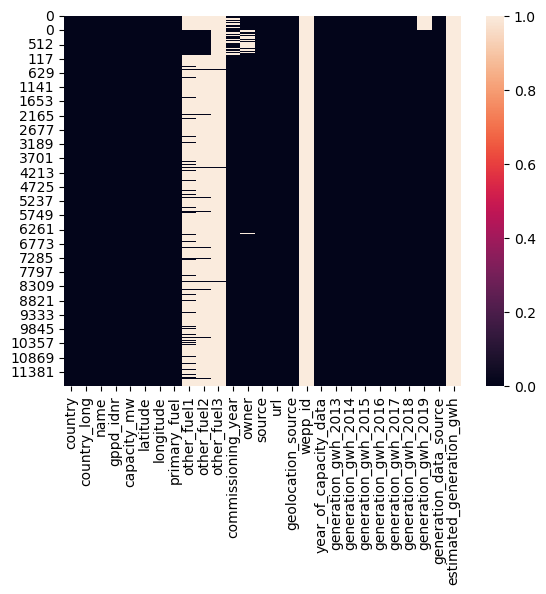

In [45]:
sns.heatmap(df.isnull())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13298 non-null  float64
 5   latitude                  13298 non-null  float64
 6   longitude                 13298 non-null  float64
 7   primary_fuel              13298 non-null  object 
 8   other_fuel1               2337 non-null   object 
 9   other_fuel2               1176 non-null   object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        12704 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [47]:
df.drop(['url', 'owner', 'country_long', 'name','other_fuel1', 'other_fuel2', 'other_fuel3', 'estimated_generation_gwh', 'wepp_id'], axis=1, inplace=True)

In [48]:
df.commissioning_year.value_counts

<bound method IndexOpsMixin.value_counts of 0        2011.00000
1               NaN
2               NaN
3        2004.00000
4        2015.00000
            ...    
11874    2012.00000
11875    2018.00000
11876    2009.00000
11877    2009.00000
11878    2013.77551
Name: commissioning_year, Length: 13298, dtype: float64>

In [49]:
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())

In [50]:
df.primary_fuel.value_counts()

Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

<Axes: xlabel='primary_fuel', ylabel='count'>

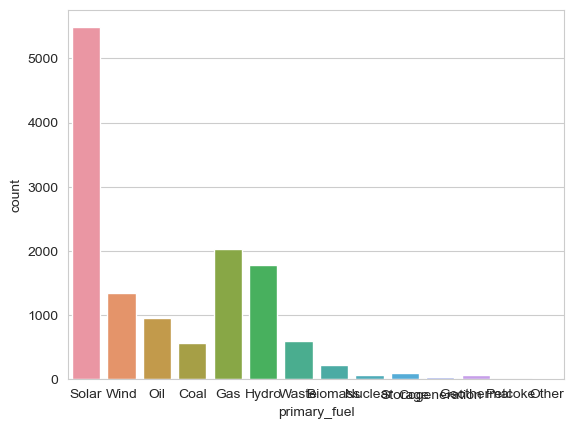

In [51]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [52]:
df.country.value_counts()

USA    11879
IND      907
AUS      512
Name: country, dtype: int64

Text(0.5, 0, 'Country')

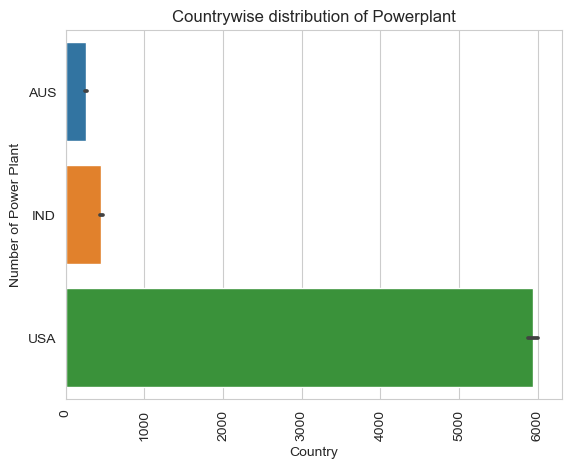

In [53]:
sns.barplot(x = df.country.index, y = df.country)
plt.xticks(rotation = 90)
plt.title('Countrywise distribution of Powerplant')
plt.ylabel('Number of Power Plant')
plt.xlabel('Country')

Text(0.5, 1.0, 'Type of power plant and capacity')

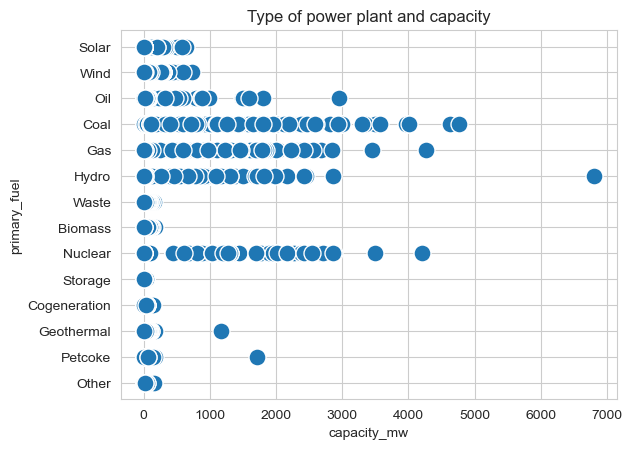

In [54]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity')

In [55]:
df.geolocation_source.value_counts()

U.S. Energy Information Administration                11837
WRI                                                     826
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: geolocation_source, dtype: int64

Text(0.5, 0, 'Country')

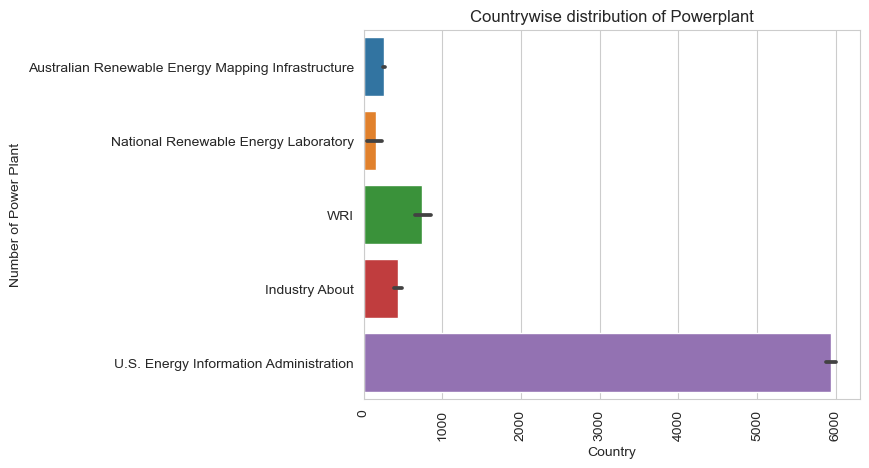

In [56]:
sns.barplot(x = df.geolocation_source.index, y = df.geolocation_source)
plt.xticks(rotation = 90)
plt.title('Countrywise distribution of Powerplant')
plt.ylabel('Number of Power Plant')
plt.xlabel('Country')

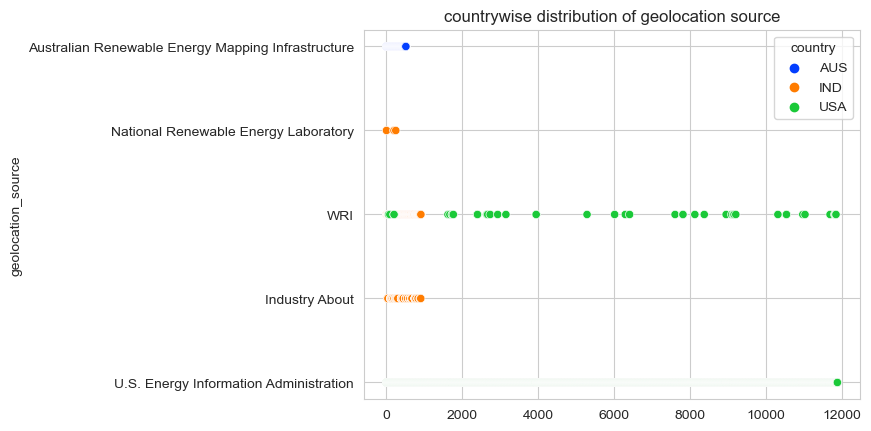

In [57]:
plt.title('countrywise distribution of geolocation source')
sns.scatterplot(x= df.geolocation_source.index, y= df.geolocation_source,data=df,hue= df.country,palette='bright')
plt.show()

In [58]:
df.generation_data_source.value_counts()

U.S. Energy Information Administration    11879
Central Electricity Authority               907
Australia Clean Energy Regulator            312
Australia Clear Energy Regulator            200
Name: generation_data_source, dtype: int64

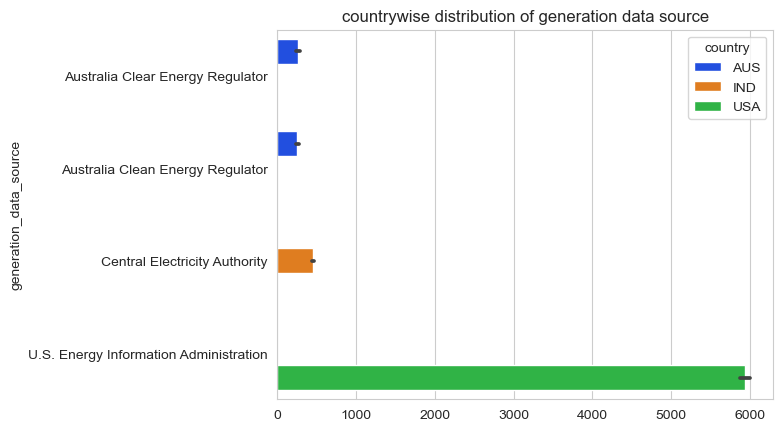

In [59]:
plt.title('countrywise distribution of generation data source')
sns.barplot(x= df.generation_data_source.index, y= df.generation_data_source,data=df,hue= df.country,palette='bright')
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df['generation_data_source'] = le.fit_transform(df['generation_data_source'])

In [61]:
df.generation_gwh_2019.value_counts()

421.93859239592916               2102
Central Electricity Authority     907
0.0                               366
0.001                              13
0.005                              12
                                 ... 
150.639                             1
51.005                              1
213.495571                          1
293.05701                           1
72.06506                            1
Name: generation_gwh_2019, Length: 8369, dtype: int64

In [62]:
df.drop(['generation_gwh_2019', 'gppd_idnr', 'source'], axis=1, inplace=True)

In [63]:
df.country.astype(float)
df.primary_fuel.astype(float)
df.geolocation_source.astype(float)
df.year_of_capacity_data.astype(float)
df.generation_data_source.astype(float)

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
11874    3.0
11875    3.0
11876    3.0
11877    3.0
11878    3.0
Name: generation_data_source, Length: 13298, dtype: float64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  int32  
 1   capacity_mw             13298 non-null  float64
 2   latitude                13298 non-null  float64
 3   longitude               13298 non-null  float64
 4   primary_fuel            13298 non-null  int32  
 5   commissioning_year      13298 non-null  float64
 6   geolocation_source      13298 non-null  int32  
 7   year_of_capacity_data   13298 non-null  object 
 8   generation_gwh_2013     13298 non-null  float64
 9   generation_gwh_2014     13298 non-null  float64
 10  generation_gwh_2015     13298 non-null  float64
 11  generation_gwh_2016     13298 non-null  float64
 12  generation_gwh_2017     13298 non-null  float64
 13  generation_gwh_2018     13298 non-null  float64
 14  generation_data_source  13298 non-null

In [65]:
df["country"] = pd.to_numeric(df["country"])
df["primary_fuel"] = pd.to_numeric(df["primary_fuel"])
df["geolocation_source"] = pd.to_numeric(df["geolocation_source"])
df["year_of_capacity_data"] = pd.to_numeric(df["year_of_capacity_data"])






In [66]:
df.describe()

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,13298.00000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.0,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000
mean,1.85479,117.699129,34.828707,-73.078418,7.808543,2000.335236,2.928410,2019.0,563.310899,663.557741,645.115353,598.035954,577.250884,564.900065,2.831328
std,0.44849,347.095704,15.909705,63.992543,3.663874,21.926802,0.663051,0.0,1491.430377,1687.590642,1700.734868,1696.601056,1714.377981,1733.879996,0.557762
min,0.00000,0.000000,-42.888300,-171.712400,0.000000,1896.000000,0.000000,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,0.000000
25%,2.00000,1.500000,33.875825,-104.583400,5.000000,1993.500000,3.000000,2019.0,15.063500,12.718750,9.140750,6.400250,5.034250,4.088500,3.000000
50%,2.00000,5.500000,38.383400,-87.307700,10.000000,2009.000000,3.000000,2019.0,533.092500,527.240856,423.256996,199.777000,111.768000,63.282000,3.000000
75%,2.00000,52.650000,42.166025,-75.391000,10.000000,2014.000000,3.000000,2019.0,563.712786,527.240856,507.402362,452.301744,421.502406,403.725956,3.000000
max,2.00000,6809.000000,425.246100,153.434100,13.000000,2020.000000,4.000000,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,3.000000


In [67]:
df.skew()

country                  -3.166005
capacity_mw               5.474779
latitude                 -1.917932
longitude                 2.295776
primary_fuel             -0.419215
commissioning_year       -2.030858
geolocation_source       -3.275339
year_of_capacity_data     0.000000
generation_gwh_2013       8.460386
generation_gwh_2014       7.503622
generation_gwh_2015       7.679427
generation_gwh_2016       7.697275
generation_gwh_2017       7.730021
generation_gwh_2018       7.645759
generation_data_source   -3.803312
dtype: float64

In [69]:
for index in df.skew().index:
    if df.skew().loc[index] > 0.5:
        df[index]= np.cbrt(df[index])
        if df.skew().loc[index] < -0.5:
            df[index]= np.square(df[index])

In [70]:
df.skew()

country                  -3.166005
capacity_mw               1.670663
latitude                 -1.917932
longitude                 2.508552
primary_fuel             -0.419215
commissioning_year       -2.030858
geolocation_source       -3.275339
year_of_capacity_data     0.000000
generation_gwh_2013       0.722441
generation_gwh_2014       0.826179
generation_gwh_2015       0.922639
generation_gwh_2016       1.096230
generation_gwh_2017       1.235372
generation_gwh_2018       1.350525
generation_data_source   -3.803312
dtype: float64

In [71]:
cor=df.corr()
cor

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,1.000000,-0.171784,0.865547,-0.944891,0.158047,-0.029930,0.604873,NaN,-0.048153,-0.244259,-0.242681,-0.268419,-0.295673,-0.305541,0.978067
capacity_mw,-0.171784,1.000000,-0.144653,0.208288,-0.457248,-0.180183,0.051471,NaN,0.267940,0.367276,0.398118,0.421264,0.443510,0.476261,-0.154425
latitude,0.865547,-0.144653,1.000000,-0.764996,0.096741,-0.058529,0.636256,NaN,-0.094853,-0.189828,-0.186056,-0.204396,-0.225944,-0.233272,0.871534
longitude,-0.944891,0.208288,-0.764996,1.000000,-0.183931,0.031581,-0.360317,NaN,0.034692,0.318893,0.317406,0.342568,0.369577,0.381050,-0.888539
primary_fuel,0.158047,-0.457248,0.096741,-0.183931,1.000000,0.446396,-0.044370,NaN,0.067243,-0.023972,-0.052093,-0.094547,-0.120709,-0.150348,0.140416
commissioning_year,-0.029930,-0.180183,-0.058529,0.031581,0.446396,1.000000,-0.029086,NaN,0.232138,0.207020,0.179733,0.126867,0.081944,0.043494,-0.029295
geolocation_source,0.604873,0.051471,0.636256,-0.360317,-0.044370,-0.029086,1.000000,NaN,-0.064273,0.029396,0.029726,0.023064,0.012123,0.011815,0.672168
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,-0.048153,0.267940,-0.094853,0.034692,0.067243,0.232138,-0.064273,NaN,1.000000,0.757068,0.709579,0.621928,0.585316,0.532741,-0.042680
generation_gwh_2014,-0.244259,0.367276,-0.189828,0.318893,-0.023972,0.207020,0.029396,NaN,0.757068,1.000000,0.912139,0.835058,0.793909,0.758519,-0.196368


<Axes: >

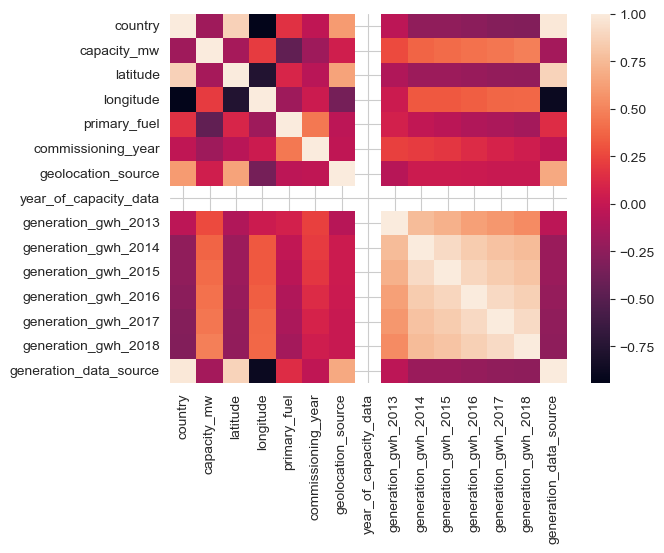

In [72]:
sns.heatmap(cor)

In [73]:
df.drop(['year_of_capacity_data'], axis=1, inplace=True)

In [74]:
cor['capacity_mw'].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2018       0.476261
generation_gwh_2017       0.443510
generation_gwh_2016       0.421264
generation_gwh_2015       0.398118
generation_gwh_2014       0.367276
generation_gwh_2013       0.267940
longitude                 0.208288
geolocation_source        0.051471
latitude                 -0.144653
generation_data_source   -0.154425
country                  -0.171784
commissioning_year       -0.180183
primary_fuel             -0.457248
year_of_capacity_data          NaN
Name: capacity_mw, dtype: float64

In [75]:
cor['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
commissioning_year        0.446396
country                   0.158047
generation_data_source    0.140416
latitude                  0.096741
generation_gwh_2013       0.067243
generation_gwh_2014      -0.023972
geolocation_source       -0.044370
generation_gwh_2015      -0.052093
generation_gwh_2016      -0.094547
generation_gwh_2017      -0.120709
generation_gwh_2018      -0.150348
longitude                -0.183931
capacity_mw              -0.457248
year_of_capacity_data          NaN
Name: primary_fuel, dtype: float64

In [76]:
df.isnull().sum()

country                   0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [78]:
x=df.drop(['capacity_mw', 'primary_fuel'],axis=1)
y=df[['capacity_mw', 'primary_fuel']]

In [79]:
y=y.astype('int')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
max_r_score=0
r_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20, random_state= r_state)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r2_scr= r2_score(y_test, pred)
    if r2_scr > max_r_score:
        max_r_score=r2_scr
        r_state= i
print('max r2 score =', max_r_score, 'at random_state', r_state)

max r2 score = 0.3078592628219628 at random_state 2


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=maxRs)